**Assignment 2: Edge detection**

*CPSC 480/580: Computer Vision*

*Yale University*

*Instructor: Alex Wong*

This assignment aims to implement several common edge detectors including, Derivative of Gaussian (DoG), Laplacian of Gaussian (LoG) and Canny Edge Detector.

You will implement each of the TODOs below and test your implementation on 4 images (original and noisy): checkerboard, coins, brick, text. You may use numpy for array operations, scipy for convolution and Gaussian, and matplotlib for visualizations.

Functions implemented during class are provided for use.

Import packages

In [34]:
import scipy
import skimage.data
import skimage.feature
import numpy as np
import matplotlib.pyplot as plt

Utility functions for plotting

In [35]:
def config_plot():
    '''
    Function to remove axis tickers and box around figure
    '''

    plt.box(False)
    plt.axis('off')

Utility functions for edge detection

In [36]:
def gradient_x_kernel():
    '''
    Returns a 2 x 2 gradient kernel in the x-direction

    Returns:
        numpy[float32] : 2 x 2 gradient kernel in the x-direction
    '''

    # TODO: Implement kernel
    return np.array([[-1, 1], [-1, 1]])

In [37]:
def gradient_y_kernel():
    '''
    Returns a 2 x 2 gradient kernel in the y-direction

    Returns:
        numpy[float32] : 2 x 2 gradient kernel in the y-direction
    '''

    # TODO: Implement kernel
    return np.array([[1, -1], [1, -1]])

In [38]:
def sobel_x_kernel(kernel_size):
    '''
    Returns a k x k sobel kernel in the x-direction
    Should support at least 3 by 3 and 5 by 5 kernel sizes

    Arg(s):
        kernel_size : int
            symmetric kernel size i.e. k x k of a Sobel kernel

    Returns:
        numpy[float32] : k x k sobel kernel in the x-direction
    '''

    sobelMatrix = np.zeros((kernel_size, kernel_size))
    center = kernel_size/2 - 0.5
    for i in range(0, sobelMatrix.shape[0]):
      for j in range(0, sobelMatrix.shape[1]):
        numerator = j - center
        distanceSquare = (i - center)**2 + (j - center)**2
        if not distanceSquare == 0:
          sobelMatrix[i, j] = numerator/distanceSquare

    # TODO: Implement kernel
    return sobelMatrix

print(sobel_x_kernel(5))

[[-0.25 -0.2   0.    0.2   0.25]
 [-0.4  -0.5   0.    0.5   0.4 ]
 [-0.5  -1.    0.    1.    0.5 ]
 [-0.4  -0.5   0.    0.5   0.4 ]
 [-0.25 -0.2   0.    0.2   0.25]]


In [39]:
def sobel_y_kernel(kernel_size):
    '''
    Returns a k x k sobel kernel in the y-direction
    Should support at least 3 by 3 and 5 by 5 kernel sizes

    Arg(s):
        kernel_size : int
            symmetric kernel size i.e. k x k of a Sobel kernel
    Returns:
        numpy[float32] : k x k sobel kernel in the y-direction
    '''
    sobelMatrix = np.zeros((kernel_size, kernel_size))
    center = kernel_size/2 - 0.5
    for i in range(0, sobelMatrix.shape[0]):
      numerator = i - center
      for j in range(0, sobelMatrix.shape[1]):
        distanceSquare = (i - center)**2 + (j - center)**2
        if not distanceSquare == 0:
          sobelMatrix[i, j] = numerator/distanceSquare

    # TODO: Implement kernel
    return sobelMatrix

In [40]:
def laplace_kernel(kernel_size):
    '''
    Returns a k x k Laplace kernel
    Should support at least 3 by 3 and 5 by 5 kernel sizes

    Arg(s):
        kernel_size : int
            symmetric kernel size i.e. k x k of a Laplace kernel
    Returns:
        numpy[float32] : k x k Laplace kernel
    '''
    if kernel_size == 3:
        return np.array([[0, 1, 0],
                         [1, -4, 1],
                         [0, 1, 0]], dtype=np.float32)
    elif kernel_size == 5:
        return np.array([[0, 0,  1, 0, 0],
                         [0, 1,  2, 1, 0],
                         [1, 2, -16, 2, 1],
                         [0, 1,  2, 1, 0],
                         [0, 0,  1, 0, 0]], dtype=np.float32)
    else:
      return None

In [41]:
def find_zero_crossing(image):
    '''
    Finds zero crossings in an image

    Arg(s):
        image : numpy[float32]
            H x W monochrome image
    Returns:
        numpy[float32] : H x W binary edge map
    '''

    # Compute the sign of the image
    image_sign = np.sign(image)

    # Find the max and min for each 2 x 2 region in the sign image
    image_max = scipy.ndimage.maximum_filter(image_sign, size=(2, 2))
    image_min = scipy.ndimage.minimum_filter(image_sign, size=(2, 2))

    # Find zero crossings
    zero_crossing = image_max - image_min
    zero_crossing = np.where(zero_crossing <= 0, 0, np.ones_like(zero_crossing))

    return zero_crossing

In [42]:
def gaussian_kernel(kernel_size, sigma):
    '''
    Returns a k x k Gaussian kernel

    Arg(s):
        kernel_size : int
            symmetric kernel size i.e. k x k of a Gaussian kernel
        sigma : int
            standard deviation of the Gaussian kernel
    Returns:
        numpy[float32] : k x k Gaussian kernel
    '''
    gaussKernel = np.zeros((kernel_size, kernel_size))
    center = kernel_size / 2 - 0.5
    for i in range(0, gaussKernel.shape[0]):
      for j in range(0, gaussKernel.shape[1]):
        distance = np.sqrt((i - center)**2 + (j - center)**2)
        exponent = -0.5*(distance/sigma)**2
        value = 1/(sigma*np.sqrt(2 * np.pi)) * np.power(np.e, exponent)
        gaussKernel[i, j] = value

    # TODO: Implement kernel by composing two 1D Gaussians
    return gaussKernel

print(gaussian_kernel(3, 1))

[[0.14676266 0.24197072 0.14676266]
 [0.24197072 0.39894228 0.24197072]
 [0.14676266 0.24197072 0.14676266]]


In [43]:
def magnitude_channelwise(image):
    '''
    Computes the magnitude (along channel dimension) of a gradient image
     i.e. gradient image with x- and y-gradients along the channel dimension

    Arg(s):
        image : numpy[float32]
            H x W x 2 image
    Returns:
        numpy[float32] : H x W magnitude image
    '''
    #Return sqrt(gx^2 + gy^2)
    # TODO: Implement channel-wise magnitude of an image
    return np.sqrt(image[:, :, 0] ** 2 + image[:, :, 1] ** 2)

In [44]:
def orientation_channelwise(image):
    '''
    Computes the orientation (along channel dimension) of a gradient image
     i.e. gradient image with x- and y-gradients along the channel dimension

    Arg(s):
        image : numpy[float32]
            H x W x 2 image
    Returns:
        numpy[float32] : H x W orientation image
    '''

    # TODO: Implement channel-wise orientation of an image
    #Return arctan(gy/gx)
    return np.arctan2(image[:,:, 1], image[:, :, 0])

In [45]:
def nonmaximal_supression(response, orientation=None):
    '''
    Implements the nonmaximal suppression (NMS) within a 3 by 3 window
    If orientation is None, then return the max response within each window
    If orientation is not None then uses the response orientation to determine
    the direction to apply NMS

    You may bin your angles into several principal orientations, i.e. 22.5, 67.5, ...

    Arg(s):
        response : numpy[float32]
            H x W response (magnitude) image
        orientation : numpy[float32]
            H x W orientation image
    Returns:
        numpy[float32] : H x W NMS response image
    '''

    # TODO: Implement non-maximal suppression
    # if orientation is given then perform orentation-based NMS, otherwise take max response (vanilla NMS)
    return None

In [46]:
def double_thresholding(response, threshold_accept, threshold_reject):
    '''
    Double thresholding for determining accepted, rejected, and potential
    edge candidate pixels in a response image

    Arg(s):
        response : numpy[float32]
            H x W response image
        threshold_accept : float32
            threshold for considering a pixel an edge pixel
        threshold_reject : float32
            threshold for considering a pixel not an edge (flat) pixel
    Returns:
        numpy[float32] : H x W accepted edge pixel image
        numpy[float32] : H x W rejected edge pixel image
        numpy[float32] : H x W potential edge pixel image
    '''

    # TODO: Implement double thresholding
    return None

In [47]:
def connect_components(response_accept, response_candidate):
    '''
    Determine if response candidate is an edge pixel based on local accepted pixels
    within 3 by 3 windows

    Arg(s):
        response_accept : numpy[float32]
            H x W response image of accepted pixels
        response_candidate : numpy[float32]
            H x W response image of potential edge pixels
    Returns:
        numpy[float32] : H x W edge image
    '''

    # TODO: Implement connect components
    return None

In [48]:
def canny(image, kernel_size, window_size, threshold_accept, threshold_reject):
    '''
    Canny edge detector for gray scale images. Returns the edge map and responses after NMS

    Arg(s):
        image : numpy[float32]
            H x W monochrome image
        kernel_size : int
            symmetric kernel size i.e. k x k for Gaussian
        window_size : int
            symmetric kernel size i.e. k x k for window or region of image to process in Canny
        threshold_accept : float32
            threshold for considering a pixel an edge pixel
        threshold_reject : float32
            threshold for considering a pixel not an edge (flat) pixel
    Returns:
        numpy[float32] : H x W edge image
        numpy[float32] : H x W NMS response image
    '''

    # TODO: Implement Canny edge detector
    return None, None

Loading data

In [49]:
# Load checkerboard image from skimage
image_checkerboard = skimage.data.checkerboard()

# Load coins image from skimage
image_coin = skimage.data.coins()

# Load brick image from skimage
image_brick = skimage.data.brick()

# Load text image from skimage
image_text = skimage.data.text()

images = [image_checkerboard, image_coin, image_brick, image_text]
images_gray = [None] * len(images)
images_noisy = [None] * len(images)

# Create gray (if images aren't already) and noisy versions of them with variance of 0.005
for idx, image in enumerate(images):

    # Convert images to gray if it isn't already
    if len(image.shape) > 2 and image.shape[-1] > 1:
        image_gray = skimage.color.rgb2gray(image)
    else:
        image_gray = image

    images_gray[idx] = image_gray

    # Add noise to simulate noisy capture for images
    image_noisy = 255 * skimage.util.random_noise(image_gray, mode='gaussian', var=0.005)

    images_noisy[idx] = image_noisy

Convolution Function

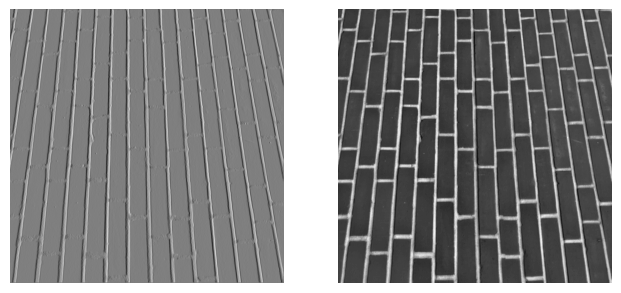

In [50]:
def convolve(image, kernel, padding = 0):

  width = int((image.shape[0] - kernel.shape[0] + 2 * padding) + 1)
  height = int((image.shape[1] - kernel.shape[1] + 2 * padding) + 1)

  xMod = kernel.shape[0] // 2
  yMod = kernel.shape[1] // 2

  newImage = np.zeros((width, height))

  for x in range(xMod, image.shape[0] - xMod):
    for y in range(yMod, image.shape[1] - yMod):

      newImageX = x - xMod
      newImageY = y - yMod

      total = 0

      for kX in range(0, kernel.shape[0]):
        for kY in range(0, kernel.shape[1]):
          total += kernel[kX, kY] * image[x + (kX - xMod), y + (kY - yMod)]

      newImage[newImageX, newImageY] = total/kernel.size

  return newImage

fig1 = plt.figure(figsize=(12, 8))

ax = fig1.add_subplot(2, 3, 1)
ax.imshow(convolve(images_gray[2], gradient_y_kernel()), cmap='gray')
config_plot()

ax = fig1.add_subplot(2, 3, 2)
ax.imshow(images_gray[2], cmap='gray')
config_plot()

Gradient-based Edge Detectors

In [ ]:
images_gray_gradient_edge = []
images_noisy_gradient_edge = []
images_gray_sobel_edge = []
images_noisy_sobel_edge = []

# TODO: Test your implementation of gradient operators on gray and noisy images
for image_gray, image_noisy in zip(images_gray, images_noisy):

    #Creates bi-channel convolution gradient, gray
    convolve_grad_x = convolve(image_gray, gradient_x_kernel())
    convolve_grad = np.empty((convolve_grad_x.shape[0], convolve_grad_x.shape[1], 2))

    convolve_grad[:, :, 0] = convolve_grad_x
    convolve_grad[:, :, 1] = convolve(image_gray, gradient_y_kernel())

    #Creates bi-channel convolution noisy, gray
    convolve_grad_noise_x = convolve(image_noisy, gradient_x_kernel())
    convolve_grad_noisy = np.empty((convolve_grad_noise_x.shape[0], convolve_grad_noise_x.shape[1], 2))

    convolve_grad_noisy[:, :, 0] = convolve_grad_noise_x
    convolve_grad_noisy[:, :, 1] = convolve(image_noisy, gradient_y_kernel())

    #Creates bi-channel convolution for sobel, gray
    convolve_sobel_x = convolve(image_gray, sobel_x_kernel(5))
    convolve_sobel = np.empty((convolve_sobel_x.shape[0], convolve_sobel_x.shape[1], 2))

    convolve_sobel[:, :, 0] = convolve_sobel_x
    convolve_sobel[:, :, 1] = convolve(image_gray, sobel_y_kernel(5))

    #Creates bi-channel convolution for noisy, gray
    convolve_sobel_noisy_x = convolve(image_noisy, sobel_x_kernel(5))
    convolve_sobel_noisy = np.empty((convolve_sobel_noisy_x.shape[0], convolve_sobel_noisy_x.shape[1], 2))

    convolve_sobel_noisy[:, :, 0] = convolve_sobel_noisy_x
    convolve_sobel_noisy[:, :, 1] = convolve(image_noisy, sobel_y_kernel(5))

    #Images Appends
    images_gray_gradient_edge.append(magnitude_channelwise(convolve_grad))
    images_noisy_gradient_edge.append(magnitude_channelwise(convolve_grad_noisy))

    images_gray_sobel_edge.append(magnitude_channelwise(convolve_sobel))
    images_noisy_sobel_edge.append(magnitude_channelwise(convolve_sobel_noisy))

# TODO: Plot edge detection (magnitude) results for gray and noisy images
fig = plt.figure(figsize=(12, 8))
rowIndex = 0
W = len(images_gray_sobel_edge)

for gray_grad, noisy_grad, gray_edge, noisy_edge in zip(images_gray_gradient_edge, images_noisy_gradient_edge, images_gray_sobel_edge, images_noisy_sobel_edge):

    # Create visualization
    ax = fig.add_subplot(W, 4, rowIndex + 1)
    ax.imshow(gray_grad, cmap='gray')
    config_plot()

    ax = fig.add_subplot(W, 4, rowIndex + 2)
    ax.imshow(noisy_grad, cmap='gray')
    config_plot()

    ax = fig.add_subplot(W, 4, rowIndex + 3)
    ax.imshow(gray_edge, cmap='gray')
    config_plot()

    ax = fig.add_subplot(W, 4, rowIndex + 4)
    ax.imshow(noisy_edge, cmap='gray')
    config_plot()

    rowIndex += 1

plt.show()

Laplacian Edge Detector

In [ ]:
images_gray_laplacian_edge = []
images_noisy_laplacian_edge = []

# TODO: Test your implementation of Laplace operators on gray and noisy images
for image_gray, image_noisy in zip(images_gray, images_noisy):
    pass

# TODO: Plot edge detection (magnitude) results for gray and noisy images

Derivative of Gaussian and Laplacian of Gaussian Edge Detectors

In [ ]:
images_gray_dog_edge = []
images_noisy_dog_edge = []
images_gray_log_edge = []
images_noisy_log_edge = []

# TODO: Test your implementation of DoG and LoG operators on gray and noisy images
for image_gray, image_noisy in zip(images_gray, images_noisy):
    pass

# TODO: Plot edge detection (magnitude) results for gray and noisy images

Canny Edge Detector

In [ ]:
images_gray_canny_nms = []
images_noisy_canny_nms = []
images_gray_canny_edge = []
images_noisy_canny_edge = []

W = len(images_gray_canny_nms)

# TODO: Test your implementation of Canny edge detector on gray and noisy images
for image_gray, image_noisy in zip(images_gray, images_noisy):

    canny_gray = canny(image_gray, 5, 3, 255, 255/3)
    canny_noisy = canny(image_noisy, 5, 3, 255, 255/3)

    images_gray_canny_edge = canny_gray[0]
    images_noisy_canny_edge = canny_noisy[0]

    images_gray_canny_nms.append(canny_gray[1])
    images_noisy_canny_nms.append(canny_noisy[1])

# TODO: Plot non-maximal supression and canny edge detection results for gray and noisy images
fig = plt.figure(figsize=(12, 8))
rowIndex = 0

for gray_nms, noisy_nms, gray_edge, noisy_edge in zip(images_gray_canny_nms, images_noisy_canny_nms, images_gray_canny_edge, images_noisy_canny_edge):

    # Create visualization
    ax = fig.add_subplot(W, 4, rowIndex + 1)
    ax.imshow(gray_nms, cmap='gray')
    config_plot()

    ax = fig.add_subplot(W, 4, rowIndex + 2)
    ax.imshow(noisy_nms, cmap='gray')
    config_plot()

    ax = fig.add_subplot(W, 4, rowIndex + 3)
    ax.imshow(gray_edge, cmap='gray')
    config_plot()

    ax = fig.add_subplot(W, 4, rowIndex + 4)
    ax.imshow(noisy_edge, cmap='gray')
    config_plot()

    rowIndex += 1

plt.show()